In [25]:
from os import listdir
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import community

from util import *

In [28]:
# description: Edges represent fiber tracts that connect one vertex to another
dir_ = '../data/Budapest Connectome/200k_fibers/'

C:\Users\jwcn9\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


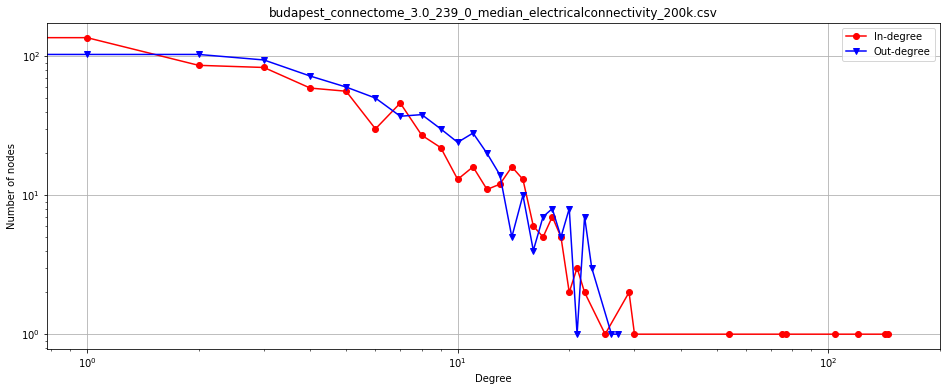

C:\Users\jwcn9\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


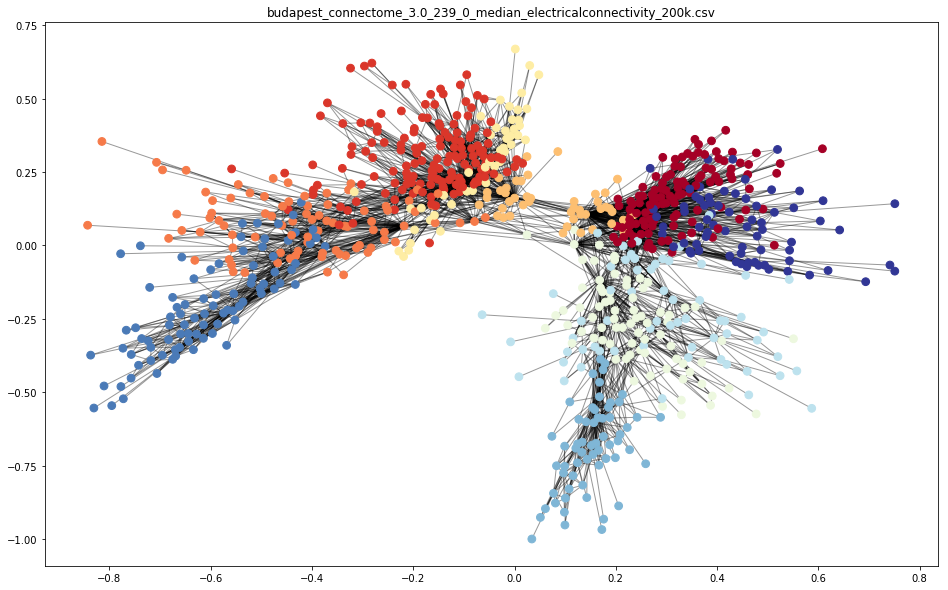

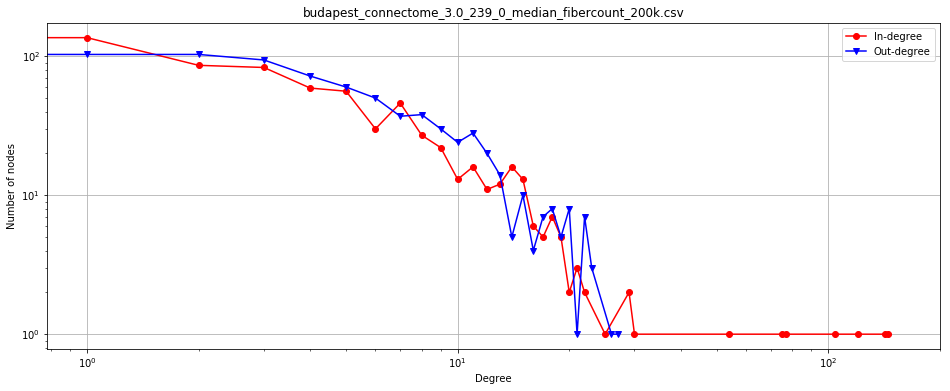

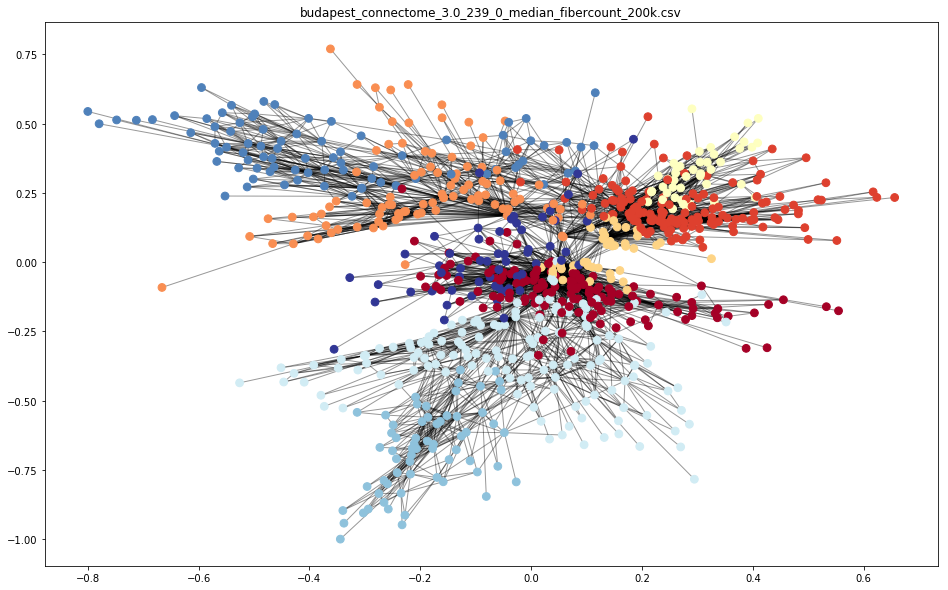

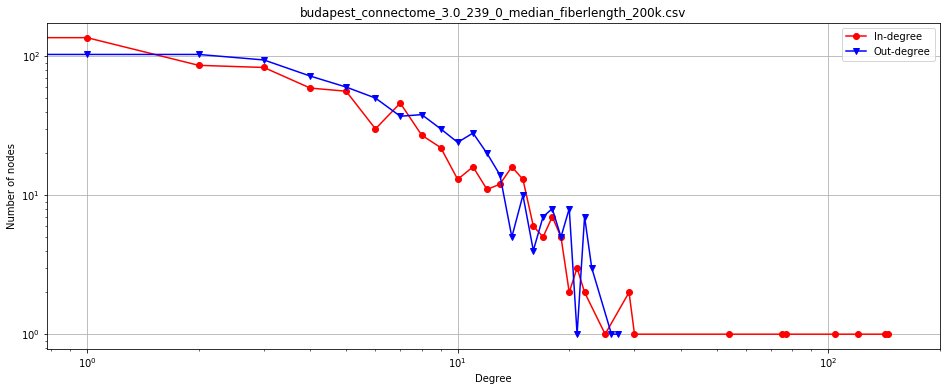

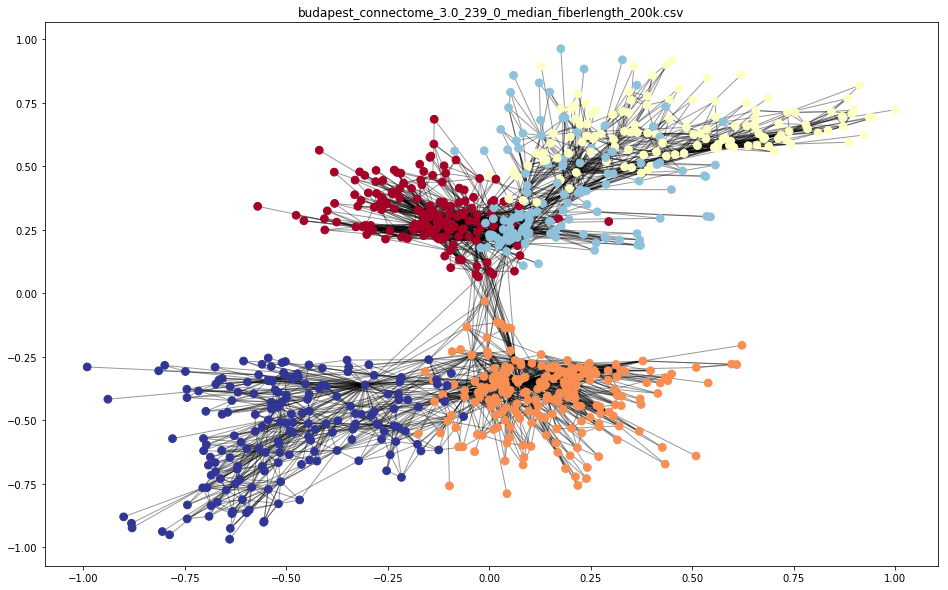

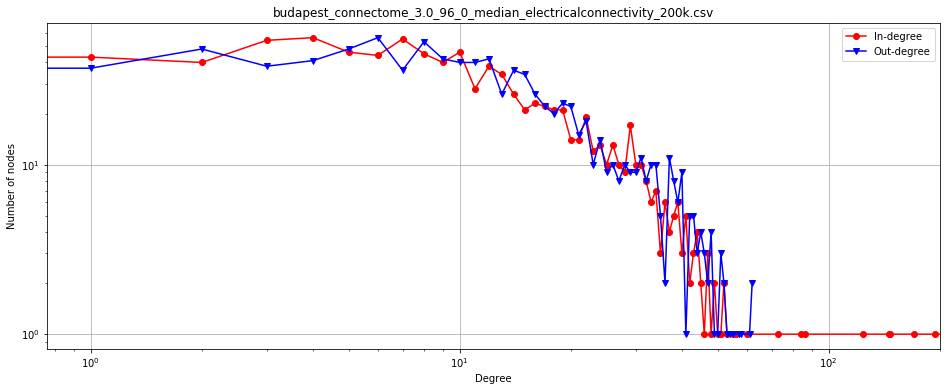

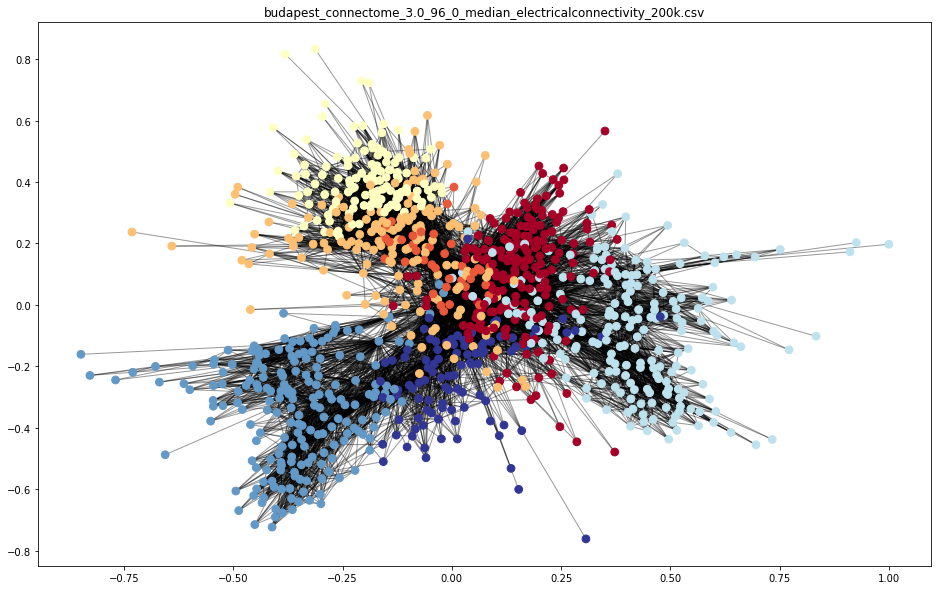

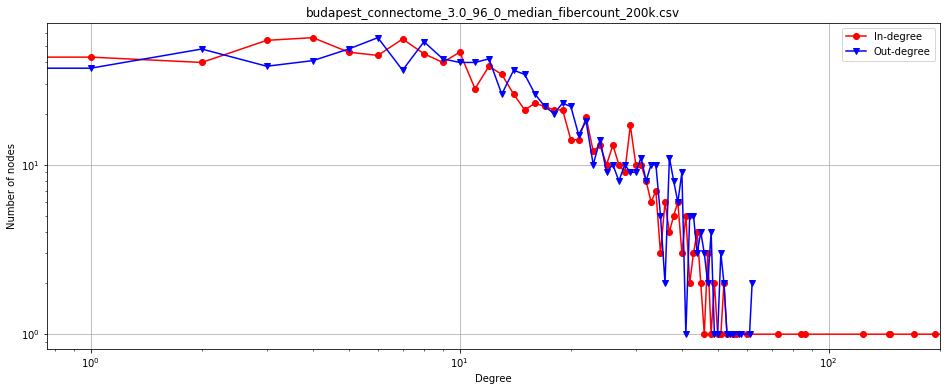

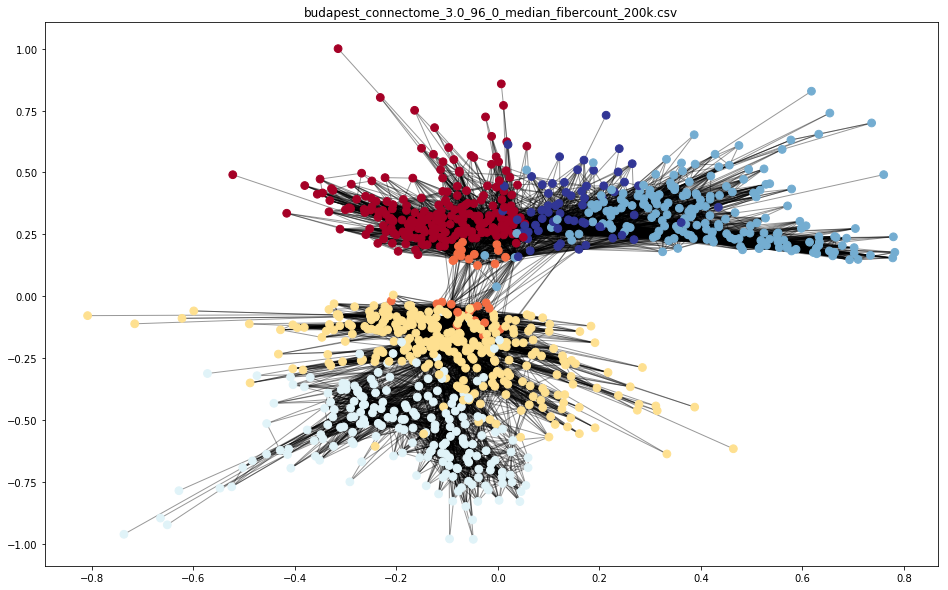

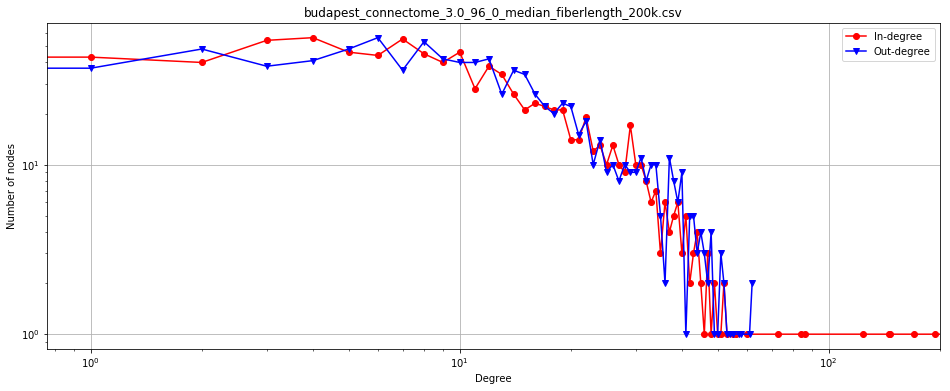

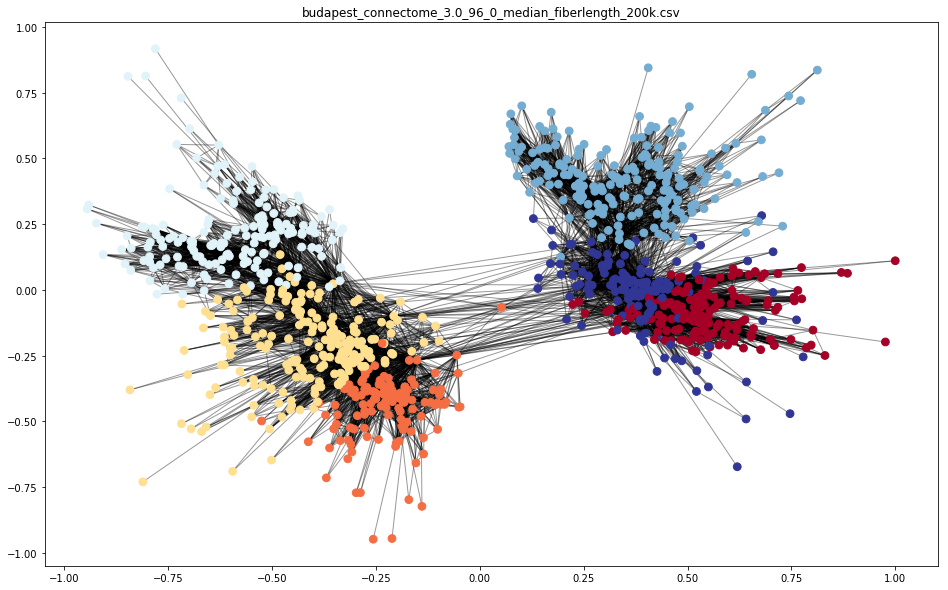

In [31]:
filenames = [filename for filename in listdir(dir_) if filename.endswith('.csv')]

for i in range(len(filenames)):
    file = filenames[i]
    if 'electricalconnectivity' in file: col = 'edge weight(med nofperflm)'
    elif 'fibercount' in file: col = 'edge weight(med nof)'
    elif 'fiberlength' in file: col = 'edge weight(med flm)'

    df = pd.read_csv(dir_ + file, delimiter=';')
    df = df.rename(columns={col:'weight'})

    G = nx.from_pandas_edgelist(df, source='id node1', target='id node2', edge_attr='weight', create_using=nx.Graph())
    H = nx.from_pandas_edgelist(df, source='id node1', target='id node2', edge_attr='weight', create_using=nx.DiGraph())

    plot_distribution(H, file.split('.')[0])
    plot_communities(G, file.split('.')[0])

In [32]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 992
Number of edges: 14392
Average degree:  29.0161
